# 3D linear regression vizualization

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import QuantileTransformer
from sklearn.linear_model import LinearRegression, HuberRegressor
from tqdm import tqdm

import xgboost as xgb
sns.set(context='paper', style="whitegrid", font_scale=2.5, font = 'serif')

In [2]:
E_true_rand_test = np.concatenate([np.load(f'../new_data/new_data/E_pure_em_test_{i}.npy') for i in [1, 2, 3]])

E_pred_rand_test = np.concatenate([np.load(f'../new_data/new_data/e_pure_em_test_{i}.npy') for i in [1, 2, 3]])

z_rand_test = np.concatenate([np.load(f'../new_data/new_data/z_pure_em_test_{i}.npy') for i in [1, 2, 3]])

In [3]:
import statsmodels.api as sm
X = np.column_stack([E_pred_rand_test])
X = sm.add_constant(X)
rlm_model = sm.RLM(E_true_rand_test, X, M=sm.robust.norms.HuberT())
ols = rlm_model.fit()

In [4]:
ols.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
               Results: Robust linear model
==========================================================
Model:              RLM              Df Residuals: 13279  
Dependent Variable: y                Norm:         HuberT 
Date:               2021-10-14 18:26 Scale Est.:   mad    
No. Observations:   13281            Cov. Type:    H1     
Df Model:           1                Scale:        0.91046
-----------------------------------------------------------
         Coef.   Std.Err.     z      P>|z|   [0.025  0.975]
-----------------------------------------------------------
const    0.5234    0.0146   35.8605  0.0000  0.4948  0.5520
x1       0.0346    0.0001  491.9116  0.0000  0.0344  0.0347
==========================================================

"""

In [5]:
E_pred_rlm = ols.predict(X)

In [6]:
x = E_pred_rand_test
y = z_rand_test
z = E_true_rand_test

In [7]:
sns.set(context='paper', style="whitegrid", font_scale=2.5, font = 'serif')

In [8]:
idx_sort = np.argsort(E_true_rand_test)
E_true_rand_test = E_true_rand_test[idx_sort]
E_pred_rand_test = E_pred_rand_test[idx_sort]

In [9]:
bins = 20

pred_test_bins = []
truth_test_bins = []
arange = np.arange(len(E_true_rand_test))
for idx in np.array_split(np.arange(len(E_true_rand_test), dtype=np.int64), bins):
# for idx in np.array_split(arange, np.logspace(5, np.log(len(truth_train)), bins, base=np.e).astype(int)):
    pred_test_bins.append(E_pred_rand_test[idx])
    truth_test_bins.append(E_true_rand_test[idx])

In [10]:
x_ref = sm.add_constant(np.linspace(0, 600))
y_ref = ols.predict(x_ref)

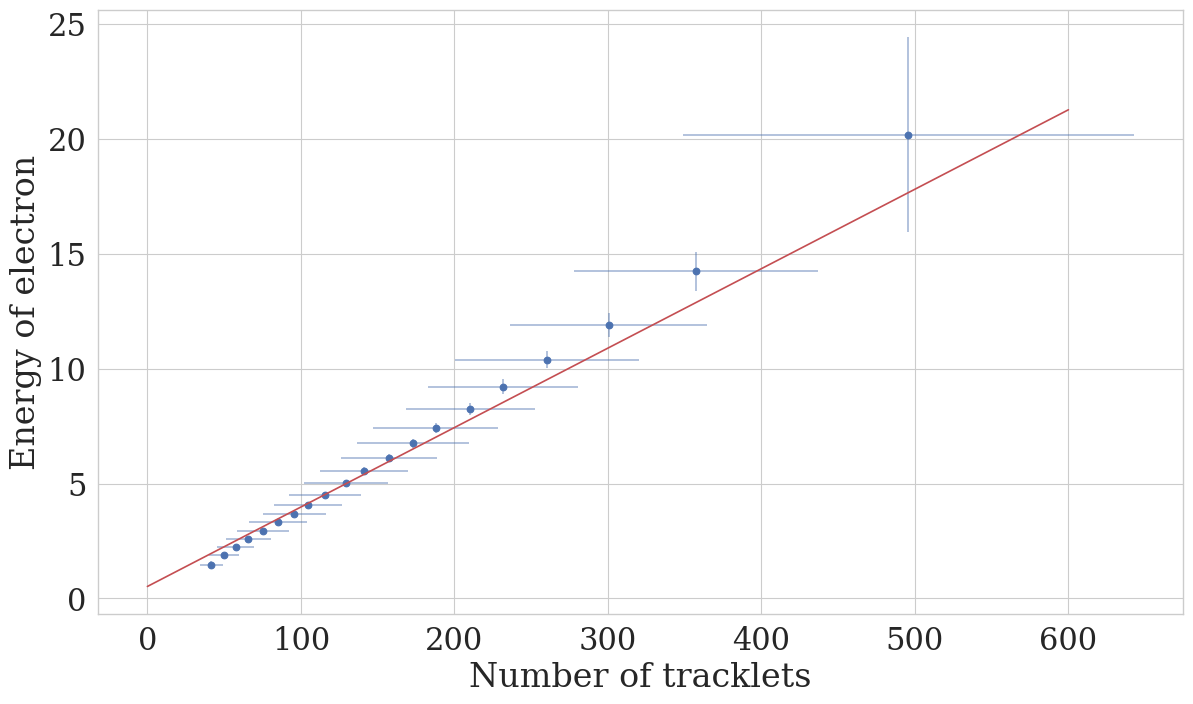

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 8), dpi=100)

color = 'b'

plt.grid(True)
axes = plt.gca()

mean_y = np.array([np.mean(b) for b in truth_test_bins])
mean_x = np.array([np.mean(b) for b in pred_test_bins])
std_y  = np.array([np.std(b) for b in truth_test_bins])
std_x  = np.array([np.std(b) for b in pred_test_bins])

plt.scatter(mean_x, mean_y)

plt.errorbar(mean_x, mean_y, xerr=std_x, yerr=std_y, fmt='none', ecolor=color, alpha=0.5)

plt.plot(x_ref[:, 1], y_ref, color='r', label='')

# plt.title('Energy versus number of tracklets')
plt.xlabel('Number of tracklets')
plt.ylabel('Energy of electron')

plt.savefig("linear_regression.pdf", bbox_inches='tight')

plt.show()

In [ ]:
plt.hist((E_pred_rlm - E_true_rand_test) / E_true_rand_test, range=(-5, 5), bins=100);

In [ ]:
E_true_rand_test

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 8), dpi=100)

color='r'

plt.grid(True)
axes = plt.gca()

mean_x = np.array([np.mean(b) for b in truth_test_bins])
mean_y = np.array([np.mean(b) for b in pred_test_bins])
std_x  = np.array([np.std(b) for b in truth_test_bins])
std_y  = np.array([np.std(b) for b in pred_test_bins])

plt.scatter(mean_x, mean_y)

plt.errorbar(mean_x, mean_y, xerr=std_x, yerr=std_y, fmt='none', ecolor=color, alpha=0.5)

plt.title('Energy versus number of tracklets')
plt.xlabel('Number of tracklets')
plt.xlabel('Energy of electron')

plt.show()

In [ ]:
ols = sm.RLM(E_true_rand_test, X, M=sm.robust.norms.HuberT())
model = rlm_model.fit()
predicted = model.predict(model_viz)

In [ ]:
x_pred = np.linspace(0, 2000, 40)   # range of porosity values

In [ ]:
sns.set(context='paper', style="whitegrid", font_scale=2., font = 'serif')

x_pred = np.linspace(0, 2000, 40)   # range of porosity values
y_pred = np.linspace(-0.4, 0.2, 40)  # range of brittleness values
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T
model_viz = sm.add_constant(model_viz)

################################################ Train #############################################

ols = sm.RLM(E_true_rand_test, X, M=sm.robust.norms.HuberT())
model = rlm_model.fit()
predicted = model.predict(model_viz)

############################################## Evaluate ############################################

r2 = 0 # model.score(X, Y)

############################################## Plot ################################################

fig = plt.figure(figsize=(18, 12), dpi=100)

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='r', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0, 0, 0, 0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('Number of tracks', labelpad=15)
    ax.set_ylabel('z-coordinate', labelpad=15)
    #if ax != ax3:
    ax.set_zlabel('Energy', labelpad=15)
    ax.locator_params(tight=True, nbins=5, axis='x')
    ax.locator_params(tight=True, nbins=5, axis='y')

ax1.view_init(elev=20, azim=-120)
ax2.view_init(elev=20, azim=114)
# ax3.view_init(elev=-20, azim=180)
# ax3.view_init(elev=40, azim=0)
ax3.view_init(elev=20, azim=-165)

# fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)

fig.tight_layout(pad=2)
fig.savefig("linear_regression_energy_reco.pdf", bbox_inches = 'tight',
    pad_inches = 0)

In [ ]:
x = E_pred_rand_test
y = z_rand_test
z = E_true_rand_test

In [ ]:
model.summary()

In [ ]:
summary = model.summary2()

In [ ]:
fig = plt.figure(figsize=(24, 8), dpi=100)

ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
axes = [ax1, ax2]

ax = ax1
ax.plot(x, z, color='r', linestyle='none', marker='o', alpha=0.05)
xx = np.linspace(x.min(), x.max(), 1000)
zz = model.params[0] + model.params[1] * xx
ax.scatter(xx, zz, facecolor=(0, 0, 0, 0), edgecolor='#70b3f0', zorder=15)
ax.set_xlabel('Number of tracks', labelpad=15)
ax.set_ylabel('Energy', labelpad=15)
ax.locator_params(tight=True, nbins=5, axis='x')
ax.locator_params(tight=True, nbins=5, axis='y')

ax = ax2
ax.plot(y * 1e5 + 37506, z, color='r', linestyle='none', marker='o', alpha=0.05)
yy = np.linspace(y.min(), y.max(), 1000)
zz = model.params[0] + model.params[2] * yy
ax.scatter(yy * 1e5 + 37506, zz, facecolor=(0, 0, 0, 0), edgecolor='#70b3f0', zorder=15)
ax.set_xlabel('z-coordinate', labelpad=15)
ax.set_ylabel('Energy', labelpad=15)


# fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)

fig.tight_layout(pad=2)
fig.savefig("linear_regression_energy_reco_2d.pdf", bbox_inches = 'tight', pad_inches = 0)

In [ ]:
¡